In [1]:
import numpy as np
import pandas as pd
X = pd.read_csv('./data/tree_class_feats.csv')
y = pd.read_csv('./data/tree_class_target.csv')
# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1]) 
print("Possible Output Classes = ", np.unique(y))

Number of Examples in the Dataset =  10000
Number of Features for each example =  10
Possible Output Classes =  [0 1]


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [2]:
def plot(history):
    import matplotlib.pyplot as plt 
    import matplotlib
    %matplotlib inline
    matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylim(0,1)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss', 'validation loss'], loc='upper right')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


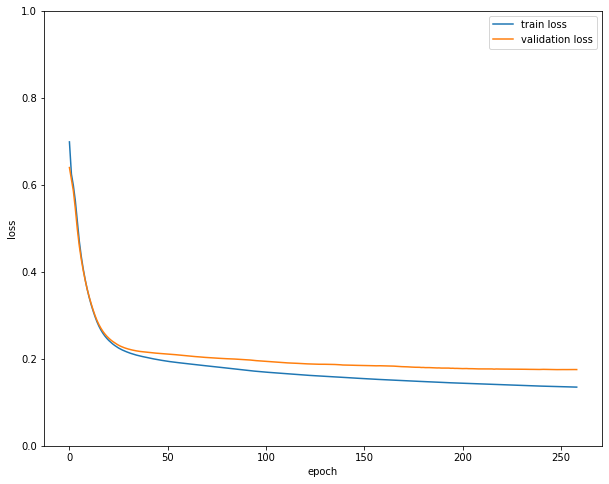

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
import numpy as np
from tensorflow import random
seed =42
np.random.seed(seed)
random.set_random_seed(seed)
model = Sequential()
es = EarlyStopping(monitor='val_loss',mode='min',patience=10)
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy')
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=50, verbose=0, shuffle=False,callbacks=[es])
plot(history)